In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1.airfoil_self_noise.csv 로드

In [2]:
df = pd.read_csv('airfoil_self_noise.csv')
df.head()

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [3]:
asn = df.values

In [4]:
# y는 마지막 열, X는 y를 제외한 모든 열
X = asn[:, :5]
y = asn[:, -1]

In [5]:
# X shape 출력
print(X.shape)

(1502, 5)


In [6]:
# y shape 출력
print(y.shape)

(1502,)


## 2.학습데이터와 테스트데이터 분리

In [7]:
# 전체 데이터의 80%는 학습 데이터, 20%는 테스트 데이터로 분리
# X_train: 학습데이터의 X
# y_train: 학습데이터의 y
# X_test: 테스트데이터의 X
# y_test: 테스트데이터의 y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# X_train (학습데이터의 X) shape
print(X_train.shape)

(1201, 5)


In [9]:
# y_train (학습데이터의 y) shape
print(y_train.shape)

(1201,)


In [10]:
# X_test (테스트데이터의 X) shape
print(X_test.shape)

(301, 5)


In [11]:
# y_test (테스트데이터의 X) shape
print(y_test.shape)

(301,)


## 3.Polynomial regression 학습하기

In [12]:
# 최초에는 Polynomial degree를 1로 설정하여 실행 한후, degree를 증가시키며 테스트 결과 확인
pf = PolynomialFeatures(degree=1)
pf.fit(X_train)

PolynomialFeatures(degree=1)

In [13]:
Xp_train = pf.transform(X_train)

In [14]:
p_lr = LinearRegression()
p_lr.fit(Xp_train, y_train)

LinearRegression()

## 4.X_test를 이용하여 y_pred(예측값) 구하기

In [18]:
Xp_test = pf.transform(X_test)
y_pred = p_lr.predict(Xp_test)

print(y_pred)

[119.59428851 124.26257898 113.19051744 130.78185168 120.27405541
 127.01921389 119.76384799 128.19052518 117.02865914 128.76520096
 132.29602952 127.24801699 115.28985486 129.70045456 127.58738114
 130.72615253 132.9527019  132.75140227 113.9068397  129.69576643
 119.83809913 123.59601653 132.22122568 120.81693075 124.76916576
 120.89551964 123.4976496  126.56931334 134.45566373 118.27829703
 127.00500175 116.65860164 124.1763869  129.59608651 127.35008615
 124.83578556 128.68004079 123.75671753 122.26519527 130.38737083
 133.89107683 121.7132296  121.89521389 129.16487455 125.42652601
 127.75000632 119.9934196  117.92656605 125.00230138 116.49539457
 124.9250026  123.70410748 120.19952046 121.39629926 123.66293317
 124.98418468 122.26216665 115.3953467  125.45909259 122.05618399
 129.20856843 125.35811413 128.83254482 120.67428019 117.04431345
 121.21583167 121.28570874 124.20745524 129.71202773 126.25859762
 126.46817108 131.230552   129.09314788 124.40054959 127.85570975
 131.17687

## 5.Mean Squared Error(mse) 구하기

In [16]:
print(mean_squared_error(y_test, y_pred))

22.09077524990859


## [서술형] degree를 1부터 증가시키며, 테스트 결과를 통해 Overfitting과 Underfitting에 대해 설명하시오.

[작성]
degree를 증가시킬수록 training data에 fitting을 더욱 시도하는데, 자칫 잘못하면 과하게 학습된 과대적합(Overfitting) 현상이 일어날 수 있다. 이와 반대로 degree가 적절한 수준보다 감소하면 MSE 값이 커지며 학습이 덜 된 과소적합(Underfittin) 현상이 일어날 수 있다.

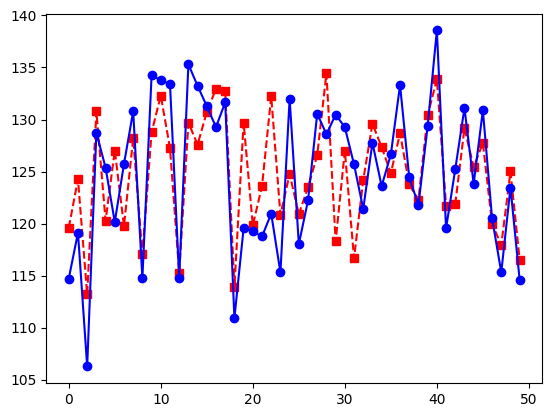

In [17]:
# 차트를 통한 y_pred(예측값)과 y_test 비교
import matplotlib.pyplot as plt

plt.plot(y_pred[:50], 'rs--')
plt.plot(y_test[:50], 'bo-')